In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import pandas as pd

In [2]:
dataset = pd.read_csv('soc-sign-bitcoinotc.csv', header=None)
dataset.columns = ['source', 'target', 'rating', 'timestamp']
edge_list = [(int(row['source']), int(row['target']), int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [4]:
delta = 30 #seconds

## PaCo

In [5]:
def execute_paco(delta, k):
    start = time()
    C = paco(data, delta, k)
    end = time()
    
    count = sum(C.values())
    return count, end-start

In [6]:
results = []
for k in trange(1, 6):
    count, runtime = execute_paco(delta, k)
    results.append((count, runtime, k))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.39it/s]


In [7]:
_, paco_runtimes_sec, paco_k = zip(*results)

## Baseline

In [8]:
t = create_temporal_network(edge_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35592/35592 [00:01<00:00, 30634.51it/s]


In [9]:
results = []
for k in trange(1, 6):
    count, runtime = get_total_causal_paths(t, delta, k)
    results.append((count, runtime, k))

  0%|                                                                                                                                                                                         | 0/5 [00:00<?, ?it/s]

2023-12-17 23:53:02 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:11 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1099766
Roots:		33541
Leaves:		1064299
Links:		1067760
Acyclic:	None

2023-12-17 23:53:11 [Severity.INFO]	Generating causal trees for 33541 root nodes ...
2023-12-17 23:53:13 [Severity.INFO]	finished.


 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:11<00:44, 11.13s/it]

Number of causal paths: Total path count: 		33678.0 
[Unique / Sub paths / Total]: 	[33678.0 / 73155.0 / 106833.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0572480551101608 
Paths of length k = 0		0.0 [ 0.0 / 69284.0 / 69284.0 ]
Paths of length k = 1		31765.0 [ 31765.0 / 3841.0 / 35606.0 ]
Paths of length k = 2		1898.0 [ 1898.0 / 30.0 / 1928.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]


2023-12-17 23:53:13 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:22 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1099766
Roots:		33541
Leaves:		1064299
Links:		1067760
Acyclic:	None

2023-12-17 23:53:22 [Severity.INFO]	Generating causal trees for 33541 root nodes ...
2023-12-17 23:53:23 [Severity.INFO]	finished.


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [00:21<00:32, 10.97s/it]

Number of causal paths: Total path count: 		33678.0 
[Unique / Sub paths / Total]: 	[33678.0 / 73155.0 / 106833.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0572480551101608 
Paths of length k = 0		0.0 [ 0.0 / 69284.0 / 69284.0 ]
Paths of length k = 1		31765.0 [ 31765.0 / 3841.0 / 35606.0 ]
Paths of length k = 2		1898.0 [ 1898.0 / 30.0 / 1928.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]


2023-12-17 23:53:24 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:32 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1099766
Roots:		33541
Leaves:		1064299
Links:		1067760
Acyclic:	None

2023-12-17 23:53:32 [Severity.INFO]	Generating causal trees for 33541 root nodes ...
2023-12-17 23:53:34 [Severity.INFO]	finished.


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3/5 [00:32<00:21, 10.94s/it]

Number of causal paths: Total path count: 		33678.0 
[Unique / Sub paths / Total]: 	[33678.0 / 73155.0 / 106833.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0572480551101608 
Paths of length k = 0		0.0 [ 0.0 / 69284.0 / 69284.0 ]
Paths of length k = 1		31765.0 [ 31765.0 / 3841.0 / 35606.0 ]
Paths of length k = 2		1898.0 [ 1898.0 / 30.0 / 1928.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]


2023-12-17 23:53:35 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:43 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1099766
Roots:		33541
Leaves:		1064299
Links:		1067760
Acyclic:	None

2023-12-17 23:53:43 [Severity.INFO]	Generating causal trees for 33541 root nodes ...
2023-12-17 23:53:45 [Severity.INFO]	finished.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 4/5 [00:43<00:10, 10.68s/it]

Number of causal paths: Total path count: 		33678.0 
[Unique / Sub paths / Total]: 	[33678.0 / 73155.0 / 106833.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0572480551101608 
Paths of length k = 0		0.0 [ 0.0 / 69284.0 / 69284.0 ]
Paths of length k = 1		31765.0 [ 31765.0 / 3841.0 / 35606.0 ]
Paths of length k = 2		1898.0 [ 1898.0 / 30.0 / 1928.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]


2023-12-17 23:53:45 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:53 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1099766
Roots:		33541
Leaves:		1064299
Links:		1067760
Acyclic:	None

2023-12-17 23:53:53 [Severity.INFO]	Generating causal trees for 33541 root nodes ...
2023-12-17 23:53:55 [Severity.INFO]	finished.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.75s/it]

Number of causal paths: Total path count: 		33678.0 
[Unique / Sub paths / Total]: 	[33678.0 / 73155.0 / 106833.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0572480551101608 
Paths of length k = 0		0.0 [ 0.0 / 69284.0 / 69284.0 ]
Paths of length k = 1		31765.0 [ 31765.0 / 3841.0 / 35606.0 ]
Paths of length k = 2		1898.0 [ 1898.0 / 30.0 / 1928.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]




In [10]:
_, baseline_runtimes_sec, baseline_k = zip(*results)

## Plots

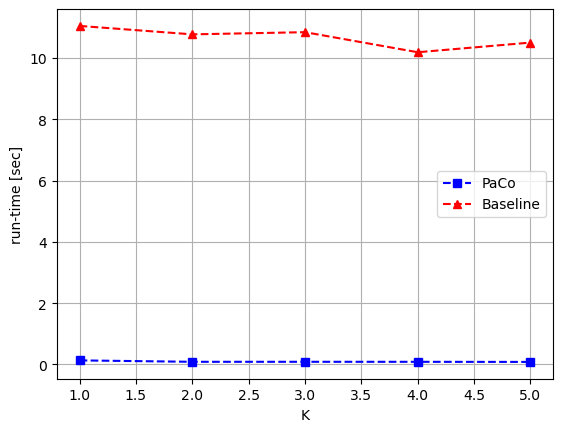

In [11]:
plt.plot(paco_k, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_k, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("K")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/socbitcoin_right_panel.png')
plt.show()